# Task 6.5. Adaptive median filter
---
***Author: Piotr Skalski***

## Imports

In [54]:
import numpy as np
import scipy.io as sio
import cv2
import os
import pprint
from tqdm import tqdm

import display_util

import matplotlib.pyplot as plt
%matplotlib inline

## Settings

In [4]:
SOURCE_DIR = "./../data/"
IMAGE_NAME = "plytkaSzumImp.bmp"

## Loading image

In [5]:
# building path to file
image_path = os.path.join(SOURCE_DIR, IMAGE_NAME)
# loading files
image = cv2.imread(image_path, 0)

## Display image

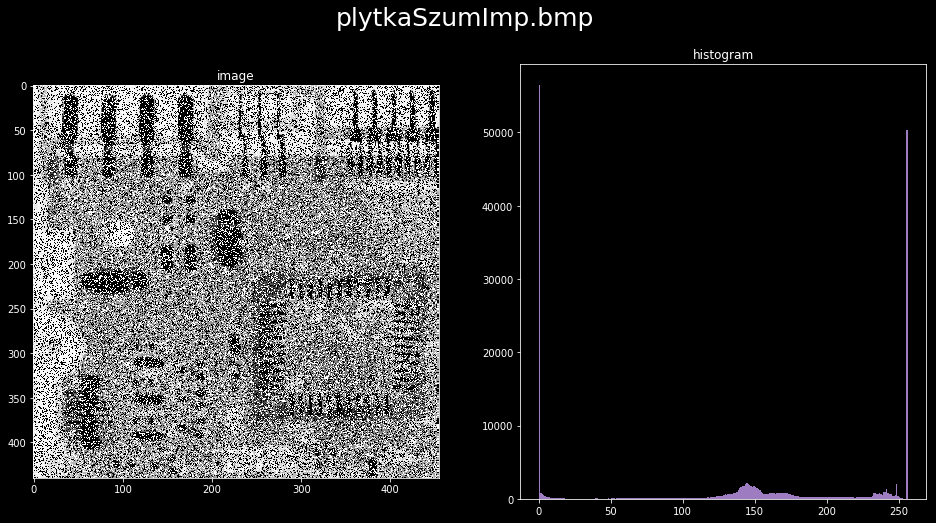

In [6]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(16,8))
fig.suptitle('plytkaSzumImp.bmp', fontsize = 25)
ax1 = fig.add_subplot(121)
ax1.imshow(image, 'gray')
ax1.set_title("image")

ax2 = fig.add_subplot(122)
ax2.hist(image.ravel(), 256, [0,256], color = '#9E7CC1')
ax2.set_title("histogram")

plt.show()

## Implementation

In [34]:
def adapt_first_stage(image, anchor_x, anchor_y, s_max):
    size = 1
    while size <= s_max:
        s_xy = image[anchor_x - size : anchor_x + size + 1, anchor_y - size : anchor_y + size + 1]
        z_min = s_xy.min()
        z_max = s_xy.max()
        z_med = np.median(s_xy)
        z_xy = image[anchor_x, anchor_y]
        
        A1 = z_med - z_min
        A2 = z_med - z_max
        
        if (A1 > 0 and A2 < 0):
            return adapt_second_stage(z_xy, z_min, z_max, z_med)
        
        size += 1
    
    return z_med

In [35]:
def adapt_second_stage(z_xy, z_min, z_max, z_med):
    B1 = z_xy - z_min
    B2 = z_xy - z_max
    if (B1  > 0 and B2 < 0):
        return z_xy
    else:
        return z_med

In [63]:
def adaptive_median_filter(image, s_max=3):
    height, width = image.shape
    output_image = np.zeros((height, width))
    
    for x in range(s_max, height - s_max):
        for y in range(s_max, width - s_max):
            output_image[x, y] = int(adapt_first_stage(image, x, y, s_max))
            
    return output_image

In [64]:
output_image = adaptive_median_filter(image, 3)

/home/afghan/Dokumenty/REPOZYTORIA/ILearnComputerVision.py/.env/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in ubyte_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


## Display output image

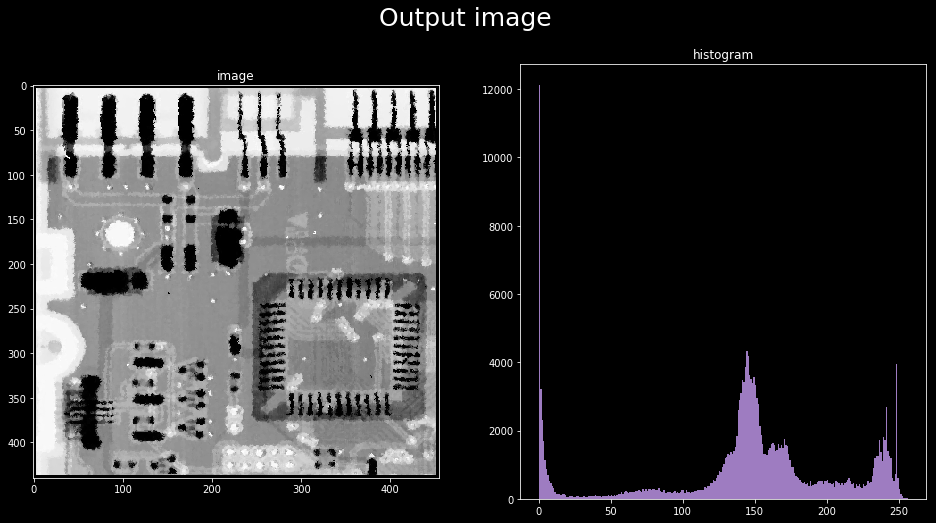

In [65]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(16,8))
fig.suptitle('Output image', fontsize = 25)
ax1 = fig.add_subplot(121)
ax1.imshow(output_image, 'gray')
ax1.set_title("image")

ax2 = fig.add_subplot(122)
ax2.hist(output_image.ravel(), 256, [0,256], color = '#9E7CC1')
ax2.set_title("histogram")

plt.show()